# Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import normaltest
from scipy.stats import norm
from scipy.stats import t as t_student
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

sns.set()

# Dataframe

In [2]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/97fe77d1-2aec-4660-a799-c6eaccd14ea7.csv')

df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [3]:
df.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [4]:
df.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


# Milestone 1 - Amostra e Descrição



1. Calcule o tamanho de amostra ideal, considerando que você deseja estimar a média de dinheiro gasto com saúde (Medical Care Expenditure) com um erro máximo de 500, e um nível de confiança de 95%.

In [5]:
sigma = df['Medical Care Expenditure'].std()
max_erro = 500
confidence = 0.95
meaningfulness = 1 - confidence
z_alpha_2 = norm.ppf(confidence + meaningfulness / 2)

n = (z_alpha_2 * sigma / max_erro)**2

n = int(np.ceil(n))

print(f'Tamanho da amostra: {n}')

Tamanho da amostra: 11121


2. Obtenha uma amostra do dataset, considerando o tamanho da amostra que você calculou anteriormente e, em seguida, faça uma análise descritiva dos dados com, pelo menos, 10 variáveis quantitativas.

In [6]:
df_sample = df.sample(n = n, random_state = 101)

df_sample.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
1849,162566,V - Bicol Region,85025,Enterpreneurial Activities,1,28108,22932,3614,10058,3750,...,0,0,0,0,0,3,0,0,0,0
29179,218765,IVA - CALABARZON,71775,Other sources of Income,0,30273,20091,7180,4092,1300,...,1,0,0,0,0,3,0,0,0,0
20513,551982,NCR,214203,Wage/Salaries,0,21228,12326,48055,17536,660,...,1,1,0,0,0,3,2,0,0,0
28910,443465,I - Ilocos Region,223936,Other sources of Income,0,66348,51000,36404,12411,2172,...,1,1,0,0,0,3,1,0,0,1
2162,144350,ARMM,80055,Enterpreneurial Activities,1,31586,24864,280,15975,2798,...,0,0,0,0,0,2,0,0,1,0


In [7]:
columns = df_sample.corr().columns

columns

Index(['Total Household Income', 'Total Food Expenditure',
       'Agricultural Household indicator', 'Bread and Cereals Expenditure',
       'Total Rice Expenditure', 'Meat Expenditure',
       'Total Fish and  marine products Expenditure', 'Fruit Expenditure',
       'Vegetables Expenditure', 'Restaurant and hotels Expenditure',
       'Alcoholic Beverages Expenditure', 'Tobacco Expenditure',
       'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Age',
       'Total Number of Family members',
       'Members with age less than 5 year old',
       'Members with age 5 - 17 years old',
      

In [8]:
variables = columns[:10]

variables

Index(['Total Household Income', 'Total Food Expenditure',
       'Agricultural Household indicator', 'Bread and Cereals Expenditure',
       'Total Rice Expenditure', 'Meat Expenditure',
       'Total Fish and  marine products Expenditure', 'Fruit Expenditure',
       'Vegetables Expenditure', 'Restaurant and hotels Expenditure'],
      dtype='object')

In [9]:
df_simplified = df_sample[variables]

df_simplified.head()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure
1849,162566,85025,1,28108,22932,3614,10058,3750,4366,24490
29179,218765,71775,0,30273,20091,7180,4092,1300,2086,13660
20513,551982,214203,0,21228,12326,48055,17536,660,5140,93010
28910,443465,223936,0,66348,51000,36404,12411,2172,7555,47464
2162,144350,80055,1,31586,24864,280,15975,2798,9030,4660


In [10]:
df_simplified['Agricultural Household indicator'].unique()

array([1, 0, 2], dtype=int64)

## Classificação das variáveis

In [11]:
continuous_quantitative = ['Total Household Income', 'Total Food Expenditure', 'Bread and Cereals Expenditure',
                           'Total Rice Expenditure', 'Meat Expenditure', 'Total Fish and  marine products Expenditure',
                           'Fruit Expenditure', 'Vegetables Expenditure', 'Restaurant and hotels Expenditure'
                          ]
discrete_quantitative = ['Agricultural Household indicator']

print(f'Variáveis quantitativas contínuas: {continuous_quantitative}')
print(f'Variáveis quantitativas discretas: {discrete_quantitative}')

Variáveis quantitativas contínuas: ['Total Household Income', 'Total Food Expenditure', 'Bread and Cereals Expenditure', 'Total Rice Expenditure', 'Meat Expenditure', 'Total Fish and  marine products Expenditure', 'Fruit Expenditure', 'Vegetables Expenditure', 'Restaurant and hotels Expenditure']
Variáveis quantitativas discretas: ['Agricultural Household indicator']


## Simetria das variáveis quantitativas

In [12]:
quantitatives = []
quantitatives.extend(continuous_quantitative)
quantitatives.extend(discrete_quantitative)

for variable in quantitatives:
    average = df_simplified[variable].mean() 
    median = df_simplified[variable].median()
    mode = df_simplified[variable].mode()
    
    if average == median and median == mode[0]:
        classification = 'Simétrica'
    elif mode[0] < median and median < average:
        classification = 'Assimétrica à Direita'
    else:
        classification = 'Assimétrica à Esquerda'
    
    print(f'Variável: {variable}')
    print(f'Média: {average}')
    print(f'Mediana: {median}')
    # Considerando casos em que a moda tem mais de um valor, pega-se o primeiro elemento
    print(f'Moda: {mode[0]}')
    print(f'Classificação: {classification}')
    print()

Variável: Total Household Income
Média: 248771.8727632407
Mediana: 163360.0
Moda: 119400
Classificação: Assimétrica à Direita

Variável: Total Food Expenditure
Média: 85369.30959446092
Mediana: 73157.0
Moda: 47653
Classificação: Assimétrica à Direita

Variável: Bread and Cereals Expenditure
Média: 25176.049635824118
Mediana: 23377.0
Moda: 0
Classificação: Assimétrica à Direita

Variável: Total Rice Expenditure
Média: 18205.065551659023
Mediana: 16559.0
Moda: 0
Classificação: Assimétrica à Direita

Variável: Meat Expenditure
Média: 10558.65659562989
Mediana: 7290.0
Moda: 0
Classificação: Assimétrica à Direita

Variável: Total Fish and  marine products Expenditure
Média: 10464.498066720618
Mediana: 8643.0
Moda: 0
Classificação: Assimétrica à Direita

Variável: Fruit Expenditure
Média: 2542.589065731499
Mediana: 1835.0
Moda: 810
Classificação: Assimétrica à Direita

Variável: Vegetables Expenditure
Média: 4981.1935976980485
Mediana: 4298.0
Moda: 0
Classificação: Assimétrica à Direita

Var

## Percentis

In [13]:
for variable in quantitatives:
    quartis = df_simplified[variable].quantile([0.25, 0.5, 0.75])
    
    quartis = quartis.reset_index()

    print(f'Variável: {variable}')
    for row in quartis.itertuples():
        print(f'{row.index * 100}%: {row._2:.2f}')
    print()

Variável: Total Household Income
25.0%: 104895.00
50.0%: 163360.00
75.0%: 292496.00

Variável: Total Food Expenditure
25.0%: 50856.00
50.0%: 73157.00
75.0%: 105683.00

Variável: Bread and Cereals Expenditure
25.0%: 16512.00
50.0%: 23377.00
75.0%: 31358.00

Variável: Total Rice Expenditure
25.0%: 10990.00
50.0%: 16559.00
75.0%: 23840.00

Variável: Meat Expenditure
25.0%: 3324.00
50.0%: 7290.00
75.0%: 14420.00

Variável: Total Fish and  marine products Expenditure
25.0%: 5470.00
50.0%: 8643.00
75.0%: 13370.00

Variável: Fruit Expenditure
25.0%: 1010.00
50.0%: 1835.00
75.0%: 3115.00

Variável: Vegetables Expenditure
25.0%: 2850.00
50.0%: 4298.00
75.0%: 6252.00

Variável: Restaurant and hotels Expenditure
25.0%: 1900.00
50.0%: 7340.00
75.0%: 19960.00

Variável: Agricultural Household indicator
25.0%: 0.00
50.0%: 0.00
75.0%: 1.00



# Milestone 2 - Inferência Estatística

1. Utilizando um nível de confiança de 95%, calcule o intervalo de confiança do dinheiro gasto com saúde e educação (colunas: Medical Care Expenditure e Education Expenditure).

## Saúde

In [14]:
sample_mean = df['Medical Care Expenditure'].mean()
sigma = df['Medical Care Expenditure'].std()
n = df['Medical Care Expenditure'].size
confidence = 0.95
meaningfulness = 1 - confidence

In [15]:
z_alpha_2 = norm.ppf(confidence + meaningfulness / 2)
z_alpha_2

1.959963984540054

In [16]:
error = z_alpha_2 * sigma / np.sqrt(n)
error

258.68934506630364

In [17]:
print(f'Intervalo de confiança da média do gasto com saúde: (${(sample_mean - error):.2f} , ${(sample_mean + error):.2f})')

Intervalo de confiança da média do gasto com saúde: ($6901.54 , $7418.92)


## Educação

In [18]:
sample_mean = df['Education Expenditure'].mean()
sigma = df['Education Expenditure'].std()
n = df['Education Expenditure'].size
confidence = 0.95
meaningfulness = 1 - confidence

In [19]:
z_alpha_2 = norm.ppf(confidence + meaningfulness / 2)
z_alpha_2

1.959963984540054

In [20]:
error = z_alpha_2 * sigma / np.sqrt(n)
error

204.0433038710168

In [21]:
print(f'Intervalo de confiança da média do gasto com educação: (${(sample_mean - error):.2f} , ${(sample_mean + error):.2f})')

Intervalo de confiança da média do gasto com educação: ($7269.46 , $7677.54)


2. Calcule se há diferença de média de número total de membros da família pelo sexo do chefe de família (Household Head Sex e Total Number of Family members) com 95% de confiança.

In [22]:
df['Household Head Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
sample_female = df[df['Household Head Sex'] == 'Female']
sample_male = df[df['Household Head Sex'] == 'Male']

In [24]:
sample_female.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
8,171152,CAR,67348,Other sources of Income,0,23117,15845,11464,6685,1370,...,0,0,0,0,0,2,0,0,0,0
15,171742,CAR,70892,Other sources of Income,0,30594,26788,10336,7900,1503,...,0,0,0,0,0,0,0,0,0,0
18,88170,CAR,64705,Enterpreneurial Activities,1,31984,28659,8048,7625,1625,...,0,0,0,0,0,1,0,0,0,0
28,87612,CAR,88484,Enterpreneurial Activities,0,41313,36563,15018,11071,2210,...,0,0,0,0,0,1,0,0,0,0


In [25]:
sample_male.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
5,152883,CAR,73326,Wage/Salaries,0,29065,25190,15336,8572,2614,...,0,1,0,0,0,4,0,0,0,1


In [26]:
n1 = len(sample_female)
n2 = len(sample_male)
confidence = 0.95
meaningfulness = 1 - confidence
mean_female = sample_female['Total Number of Family members'].mean()
sigma_female = sample_female['Total Number of Family members'].std()
mean_male = sample_male['Total Number of Family members'].mean()
sigma_male = sample_male['Total Number of Family members'].std()
gl = n1 + n2 - 2
D_0 = 0

In [27]:
z_alpha = norm.ppf(confidence)

z_alpha

1.6448536269514722

In [28]:
numerator = (sigma_female - sigma_male) - D_0

denominator = np.sqrt((sigma_female ** 2 / n1) + (sigma_male ** 2 / n2))

z = numerator / denominator

z

-0.1617784854446731

In [29]:
p_value = norm.sf(z)

p_value

0.5642598520150754

In [30]:
if p_value <= meaningfulness:
    print('Rejeita-se H0. Não há diferença de média de número total de membros da família pelo sexo do chefe de família.')
else:
    print('Aceita-se H0. Há diferença de média de número total de membros da família pelo sexo do chefe de família.')

Aceita-se H0. Há diferença de média de número total de membros da família pelo sexo do chefe de família.


3. Verifique se há diferença de média total de renda da família (Total Household Income) de acordo com a fonte salarial (Main Source of Income).

Considere “Enteroreneurial activities” e “other sources of income” como "outros".

In [31]:
df['Main Source of Income'].unique()

array(['Wage/Salaries', 'Other sources of Income',
       'Enterpreneurial Activities'], dtype=object)

In [32]:
sample_1 = df[df['Main Source of Income'] == 'Wage/Salaries']

sample_1.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [33]:
sample_2 = df[df['Main Source of Income'] != 'Wage/Salaries']

sample_2.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
7,134961,CAR,95644,Other sources of Income,1,37168,28156,14640,15896,3365,...,0,1,0,0,0,2,0,0,0,1
8,171152,CAR,67348,Other sources of Income,0,23117,15845,11464,6685,1370,...,0,0,0,0,0,2,0,0,0,0
9,625753,CAR,158721,Enterpreneurial Activities,0,56003,43239,26488,25678,3880,...,1,0,0,1,0,4,1,0,0,0
10,147005,CAR,79530,Enterpreneurial Activities,1,36588,30167,11174,7674,1709,...,1,0,0,0,0,1,0,0,0,1
12,101111,CAR,88523,Enterpreneurial Activities,1,40531,36200,14322,8344,2200,...,0,0,0,0,0,1,0,0,0,0


In [34]:
n1 = len(sample_female)
n2 = len(sample_male)
confidence = 0.95
meaningfulness = 1 - confidence
mean_female = sample_female['Total Household Income'].mean()
sigma_female = sample_female['Total Household Income'].std()
mean_male = sample_male['Total Household Income'].mean()
sigma_male = sample_male['Total Household Income'].std()
gl = n1 + n2 - 2
D_0 = 0

In [35]:
z_alpha = norm.ppf(confidence)

z_alpha

1.6448536269514722

In [36]:
numerator = (sigma_female - sigma_male) - D_0

denominator = np.sqrt((sigma_female ** 2 / n1) + (sigma_male ** 2 / n2))

z = numerator / denominator

z

-5.916396683844423

In [37]:
p_value = norm.sf(z)

p_value

0.9999999983546449

In [38]:
if p_value <= meaningfulness:
    print('Rejeita-se H0. Não há diferença de média total de renda da família de acordo com a fonte salarial.')
else:
    print('Aceita-se H0. Há diferença de média total de renda da família de acordo com a fonte salarial.')

Aceita-se H0. Há diferença de média total de renda da família de acordo com a fonte salarial.


# Milestone 3 - Previsão de Renda Com Regressão Linear

Usando Regressão Linear, crie um modelo de previsão de renda de forma a minimizar o erro. Considere 70% dos dados para treinar o modelo, e 30% para testá-lo. Por fim, utilize as métricas de avaliação do modelo que foram estudadas para validá-lo.

## Modelo inicial apenas com as variáveis numéricas e com mais correlação

### Variáveis com mais correlação

In [39]:
columns = []

for column in df.columns:
    if df[column].dtype == 'int64':
        correlation, p_value = pearsonr(df['Total Household Income'], df[column])
        
        if correlation > 0.6:
            columns.append(column)

columns

['Total Household Income',
 'Total Food Expenditure',
 'Clothing, Footwear and Other Wear Expenditure',
 'Housing and water Expenditure',
 'Transportation Expenditure',
 'Communication Expenditure',
 'Miscellaneous Goods and Services Expenditure']

### LinerRegression

In [40]:
columns = [column for column in columns if column != 'Total Household Income']

X = df[columns]

y = df['Total Household Income']

In [41]:
X.head()

,Total Food Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Transportation Expenditure,Communication Expenditure,Miscellaneous Goods and Services Expenditure
0,117848,4607,63636,4776,2880,34056
1,67766,8230,41370,12900,5700,9150
2,61609,2735,14340,324,420,6450
3,78189,1390,16638,6840,660,3762
4,94625,4620,31122,6996,2100,8472


In [42]:
y.head()

0    480332
1    198235
2     82785
3    107589
4    189322
Name: Total Household Income, dtype: int64

In [43]:
lr = LinearRegression().fit(X, y)

y_pred = lr.predict(X)

lr.score(X, y)

0.6993954481408245

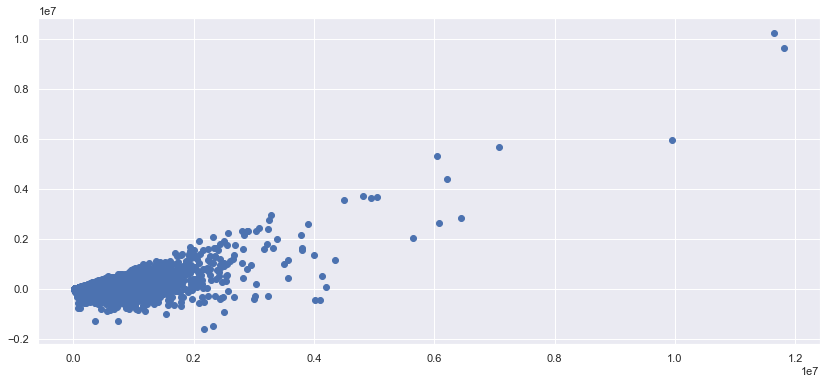

In [44]:
waste = y - y_pred

plt.figure(figsize=(14, 6))

plt.scatter(y, waste)

<AxesSubplot:xlabel='Total Household Income', ylabel='Count'>

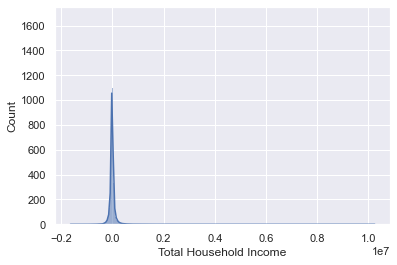

In [45]:
sns.histplot(waste, kde=True)

### Statsmodels

In [46]:
x = sm.add_constant(X)

model_initial = sm.OLS(y, x).fit()

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.699
Model:                                OLS   Adj. R-squared:                  0.699
Method:                     Least Squares   F-statistic:                 1.611e+04
Date:                    Tue, 21 Dec 2021   Prob (F-statistic):               0.00
Time:                            15:46:53   Log-Likelihood:            -5.5606e+05
No. Observations:                   41544   AIC:                         1.112e+06
Df Residuals:                       41537   BIC:                         1.112e+06
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          4155.2546   1577.467      2.634      0.008    1063.386    7247.124
Total Food Expenditure                            0.8263      0.022     38.269      0.000       0.784       0.869
Clothing, Footwear and Other Wear Expenditure     5.0707      0.137     37.070      0.000       4.803       5.339
Housing and water Expenditure                     1.4841      0.020     76.040      0.000       1.446       1.522
Transportation Expenditure                        2.0474      0.055     37.090      0.000       1.939       2.156
Communication Expenditure                         6.0593      0.171     35.506      0.000       5.725       6.394
Miscellaneous Goods and Services Expenditure      3.3553      0.062     54.375      0.000       3.234       3.476
==============================================================================
Omnibus:                    91970.258   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1636506648.287
Skew:                          20.038   Prob(JB):                         0.00
Kurtosis:                     974.496   Cond. No.                     2.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Modelo sem os outliers

### Removendo os outliers

In [48]:
columns_to_remove_outliers = []

for column in columns:
    var = df[column].var()
    mean = df[column].mean()
    
    if var > mean:
        columns_to_remove_outliers.append(column)

columns_to_remove_outliers

['Total Food Expenditure',
 'Clothing, Footwear and Other Wear Expenditure',
 'Housing and water Expenditure',
 'Transportation Expenditure',
 'Communication Expenditure',
 'Miscellaneous Goods and Services Expenditure']

<AxesSubplot:xlabel='Total Food Expenditure'>

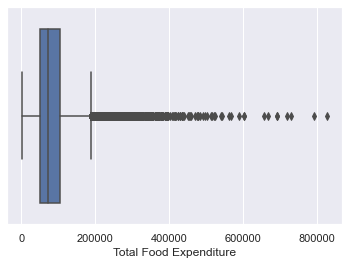

In [49]:
sns.boxplot(data=df, x='Total Food Expenditure')

<AxesSubplot:xlabel='Clothing, Footwear and Other Wear Expenditure'>

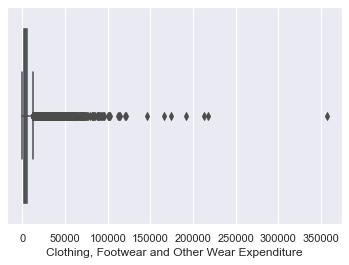

In [50]:
sns.boxplot(data=df, x='Clothing, Footwear and Other Wear Expenditure')

<AxesSubplot:xlabel='Housing and water Expenditure'>

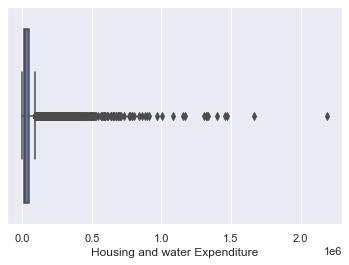

In [51]:
sns.boxplot(data=df, x='Housing and water Expenditure')

<AxesSubplot:xlabel='Transportation Expenditure'>

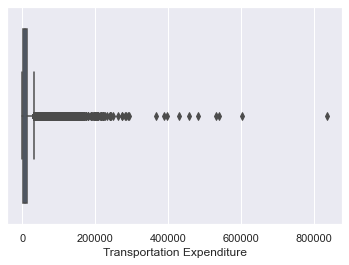

In [52]:
sns.boxplot(data=df, x='Transportation Expenditure')

<AxesSubplot:xlabel='Communication Expenditure'>

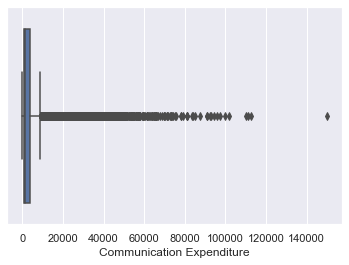

In [53]:
sns.boxplot(data=df, x='Communication Expenditure')

<AxesSubplot:xlabel='Miscellaneous Goods and Services Expenditure'>

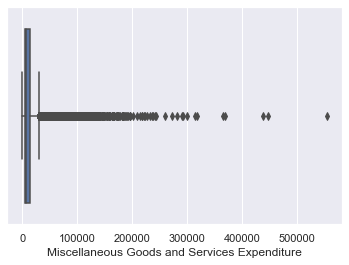

In [54]:
sns.boxplot(data=df, x='Miscellaneous Goods and Services Expenditure')

In [55]:
def calc_inf_sup_interval(column_data):
    Q1 = column_data.quantile(q=0.25)
    
    Q3 = column_data.quantile(q=0.75)

    IQR = Q3 - Q1

    inf = Q1 - 1.5 * IQR
    
    sup = Q3 + 1.5 * IQR

    return inf, sup

In [56]:
df_without_outliers = df.copy()

for column in columns_to_remove_outliers:
    inf, sup = calc_inf_sup_interval(df_without_outliers[column])
    
    df_without_outliers = df_without_outliers[(df_without_outliers[column] >= inf) & (df_without_outliers[column] <= sup)]

In [57]:
X = df_without_outliers[columns]

y = df_without_outliers['Total Household Income']

### LinearRegression

In [58]:
lr = LinearRegression().fit(X, y)

y_pred = lr.predict(X)

lr.score(X, y)

0.550779977008339

In [59]:
waste = y - y_pred

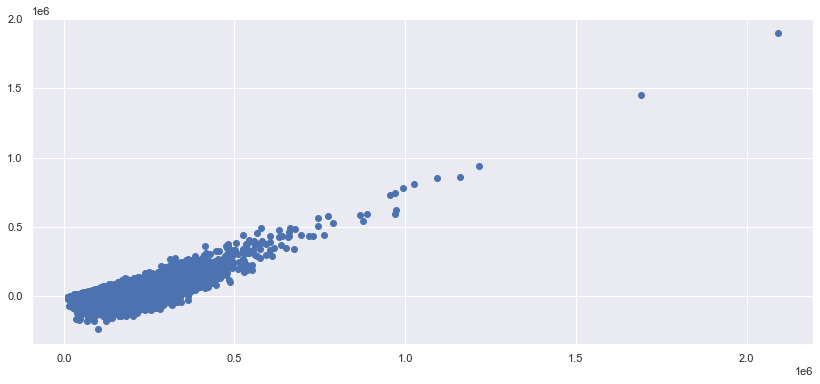

In [60]:
plt.figure(figsize=(14, 6))

plt.scatter(y, waste)

<AxesSubplot:xlabel='Total Household Income', ylabel='Count'>

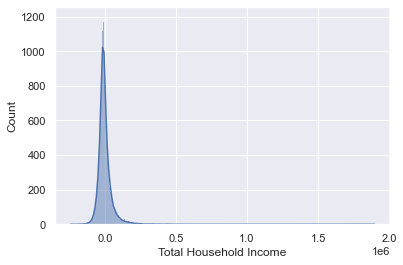

In [61]:
sns.histplot(waste, kde=True)

### Statsmodels

In [62]:
x = sm.add_constant(X)

model_initial = sm.OLS(y, x).fit()

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [63]:
model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.551
Model:                                OLS   Adj. R-squared:                  0.551
Method:                     Least Squares   F-statistic:                     5611.
Date:                    Tue, 21 Dec 2021   Prob (F-statistic):               0.00
Time:                            15:46:55   Log-Likelihood:            -3.3708e+05
No. Observations:                   27464   AIC:                         6.742e+05
Df Residuals:                       27457   BIC:                         6.742e+05
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          6975.0193    822.419      8.481      0.000    5363.037    8587.001
Total Food Expenditure                            0.9584      0.015     64.981      0.000       0.929       0.987
Clothing, Footwear and Other Wear Expenditure     3.4954      0.180     19.395      0.000       3.142       3.849
Housing and water Expenditure                     1.7044      0.028     61.468      0.000       1.650       1.759
Transportation Expenditure                        1.7716      0.081     21.744      0.000       1.612       1.931
Communication Expenditure                         6.9263      0.373     18.562      0.000       6.195       7.658
Miscellaneous Goods and Services Expenditure      1.8684      0.128     14.651      0.000       1.618       2.118
==============================================================================
Omnibus:                    32957.715   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16174586.119
Skew:                           5.905   Prob(JB):                         0.00
Kurtosis:                     121.301   Cond. No.                     1.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Modelo treinando 70% da amostra

In [64]:
X_final = df_without_outliers[columns]

y_final = df_without_outliers['Total Household Income']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=101)

In [66]:
X_final.shape

(27464, 6)

In [67]:
X_train.shape

(19224, 6)

In [68]:
X_test.shape

(8240, 6)

In [69]:
y_final.shape

(27464,)

In [70]:
y_train.shape

(19224,)

In [71]:
y_test.shape

(8240,)

### LinearRegression

In [72]:
lr_final = LinearRegression().fit(X_train, y_train)

y_est_final = lr_final.predict(X_test)

In [73]:
lr.score(X_train, y_train)

0.5667761515245482

In [74]:
r2_score(y_test, y_est_final)

0.5159859623301302

### Statsmodels

In [75]:
x = sm.add_constant(X_final)

model = sm.OLS(y_final, x).fit()

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.551
Model:                                OLS   Adj. R-squared:                  0.551
Method:                     Least Squares   F-statistic:                     5611.
Date:                    Tue, 21 Dec 2021   Prob (F-statistic):               0.00
Time:                            15:46:56   Log-Likelihood:            -3.3708e+05
No. Observations:                   27464   AIC:                         6.742e+05
Df Residuals:                       27457   BIC:                         6.742e+05
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          6975.0193    822.419      8.481      0.000    5363.037    8587.001
Total Food Expenditure                            0.9584      0.015     64.981      0.000       0.929       0.987
Clothing, Footwear and Other Wear Expenditure     3.4954      0.180     19.395      0.000       3.142       3.849
Housing and water Expenditure                     1.7044      0.028     61.468      0.000       1.650       1.759
Transportation Expenditure                        1.7716      0.081     21.744      0.000       1.612       1.931
Communication Expenditure                         6.9263      0.373     18.562      0.000       6.195       7.658
Miscellaneous Goods and Services Expenditure      1.8684      0.128     14.651      0.000       1.618       2.118
==============================================================================
Omnibus:                    32957.715   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         16174586.119
Skew:                           5.905   Prob(JB):                         0.00
Kurtosis:                     121.301   Cond. No.                     1.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:ylabel='Count'>

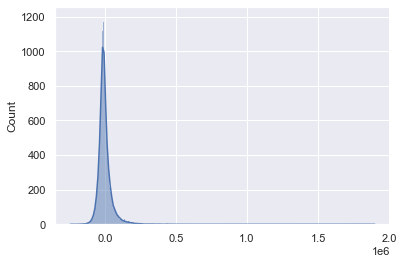

In [77]:
sns.histplot(model.resid, kde = True)

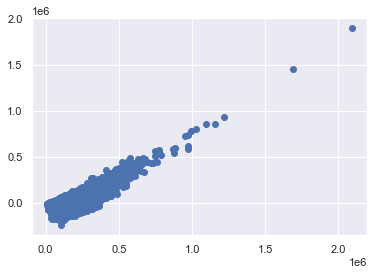

In [78]:
plt.scatter(y_final, model.resid)

## Métricas de avaliação

### R-quadrado

O valor deve estar próximo de 1.

In [79]:
r2_score(y_test, y_est_final)

0.5159859623301302

### MAE

In [80]:
mean_absolute_error(y_test, y_est_final)

31247.245195008065

### MSE

In [81]:
mean_squared_error(y_test, y_est_final)

3052141553.805008

### RMSE

In [82]:
mean_squared_log_error(y_test, y_est_final)

0.08381129093701292